# Machine Learning with Scikit-Learn: Password Strength Prediction

In [1]:
# Importing a library for mathematical operations.

import numpy as np

# Importing a library for data manipulation.

import pandas as pd

# Importing libraries for data visualization.

import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing a library for string manipulation.

import string

# Importing a library for SQLite operations.

import sqlite3

# Importing a library for warning filtration.

from warnings import filterwarnings
filterwarnings("ignore")

## Data Collection

In [2]:
# Connecting to a SQLite database.

connection = sqlite3.connect("Data.sqlite")

In [3]:
# Reading data into a Pandas DataFrame.

data = pd.read_sql_query("SELECT * FROM Users", connection)

In [4]:
# Printing first five rows of data.

data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


## Data Cleaning

In [5]:
# Checking for duplicate rows.

data.duplicated().any()

False

In [6]:
# Checking for missing values in each column.

data.isnull().any()

index       False
password    False
strength    False
dtype: bool

## Data Preprocessing

In [7]:
# Renaming password and strength columns.

data.rename(columns={"password": "Password", "strength": "Strength"}, inplace=True)

In [8]:
# Dropping index column.

data.drop("index", axis=1, inplace=True)

In [9]:
# Printing first five rows of data.

data.head()

,Password,Strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


## Data Analysis

### Analysis 1:

Analyzing the passwords and their strengths holding only numeric characters.

In [10]:
# Extracting passwords and their strengths holding only numeric characters into a Pandas DataFrame.

password_strength = data[data["Password"].str.isnumeric()]
password_strength

,Password,Strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [11]:
# Printing number of passwords holding only numeric characters.

data["Password"].str.isnumeric().sum()

26

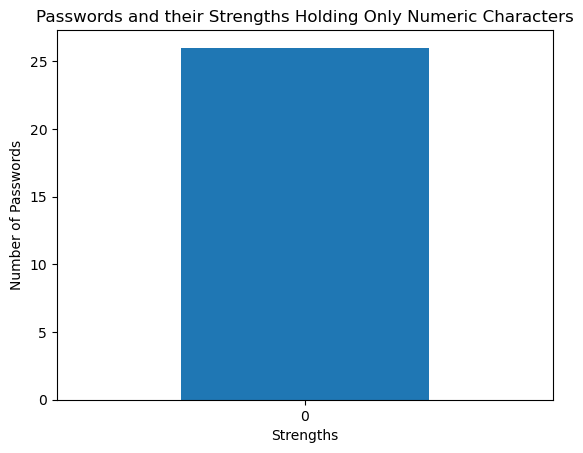

In [12]:
# Plotting a bar plot for number of passwords versus strengths.

password_strength["Strength"].value_counts().plot(kind="bar")
plt.title("Passwords and their Strengths Holding Only Numeric Characters")
plt.xlabel("Strengths")
plt.ylabel("Number of Passwords")
plt.xticks(rotation="horizontal")
plt.show()

### Conclusion 1:

26 passwords hold only numeric characters and they have poor strengths.

### Analysis 2:

Analyzing the passwords and their strengths holding only alphabetic characters.

In [13]:
# Extracting passwords and their strengths holding only alphabetic characters into a Pandas DataFrame.

password_strength = data[data["Password"].str.isalpha()]
password_strength

,Password,Strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [14]:
# Printing number of passwords holding only aplhabetic characters.

data["Password"].str.isalpha().sum()

50

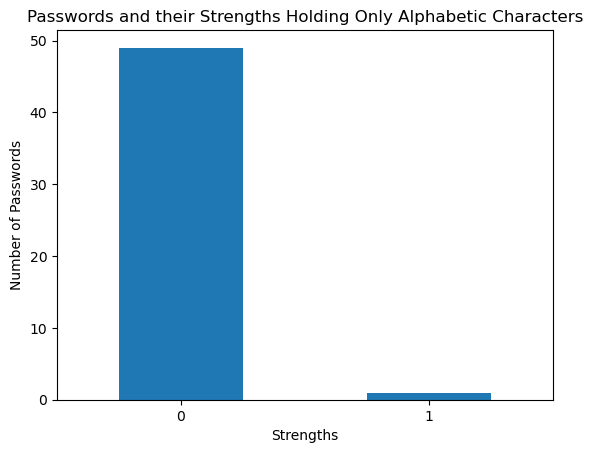

In [15]:
# Plotting a bar plot for number of passwords versus strengths.

password_strength["Strength"].value_counts().plot(kind="bar")
plt.title("Passwords and their Strengths Holding Only Alphabetic Characters")
plt.xlabel("Strengths")
plt.ylabel("Number of Passwords")
plt.xticks(rotation="horizontal")
plt.show()

### Conclusion 2:

50 passwords hold only alphabetic characters and they mostly have poor strengths.

### Analysis 3:

Analyzing the passwords and their strengths holding alphanumeric characters.

In [16]:
# Extracting passwords and their strengths holding alphanumeric characters into a Pandas DataFrame.

password_strength = data[data["Password"].str.isalnum()]
password_strength

,Password,Strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [17]:
# Printing number of passwords holding alphanumeric characters.

data["Password"].str.isalnum().sum()

97203

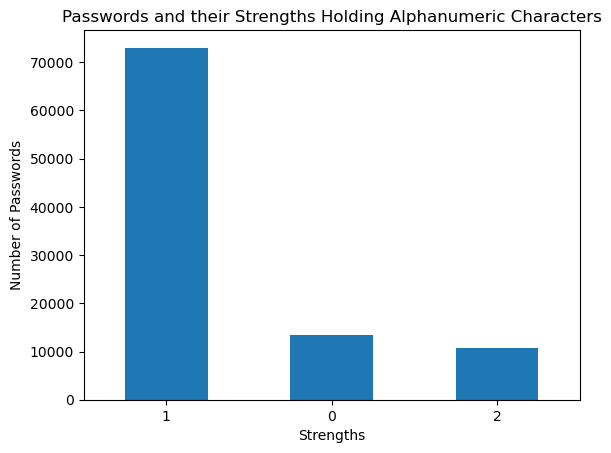

In [18]:
# Plotting a bar plot for number of passwords versus strengths.

password_strength["Strength"].value_counts().plot(kind="bar")
plt.title("Passwords and their Strengths Holding Alphanumeric Characters")
plt.xlabel("Strengths")
plt.ylabel("Number of Passwords")
plt.xticks(rotation="horizontal")
plt.show()

### Conclusion 3:

97203 passwords hold alphanumeric characters and they mostly have moderate strengths.

### Analysis 4:

Analyzing the passwords and their stregths holding lower case characters.

In [19]:
# Extracting passwords and their strengths holding lower case characters into a Pandas DataFrame.

password_strength = data[data["Password"].str.islower()]
password_strength

,Password,Strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [20]:
# Printing number of passwords holding lower case characters.

data["Password"].str.islower().sum()

86678

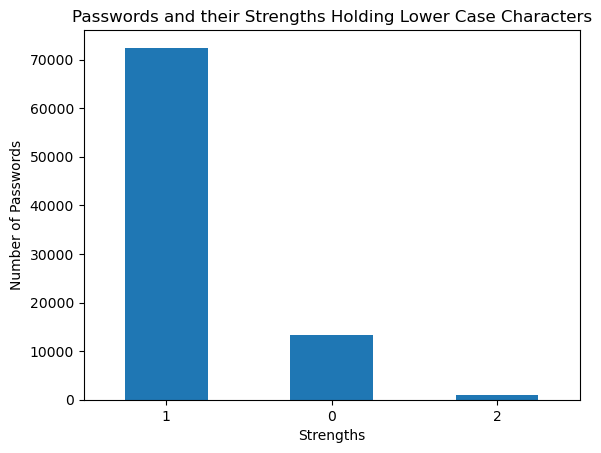

In [21]:
# Plotting a bar plot for number of passwords versus strengths.

password_strength["Strength"].value_counts().plot(kind="bar")
plt.title("Passwords and their Strengths Holding Lower Case Characters")
plt.xlabel("Strengths")
plt.ylabel("Number of Passwords")
plt.xticks(rotation="horizontal")
plt.show()

### Conclusion 4:

86678 passwords hold lower case characters and they mostly have moderate strengths.

### Analysis 5:

Analyzing the passwords and their strengths holding upper case characters.

In [22]:
# Extracting passwords and their strengths holding upper case characters into a Pandas DataFrame.

password_strength = data[data["Password"].str.isupper()]
password_strength

,Password,Strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [23]:
# Printing number of passwords holding upper case characters.

data["Password"].str.isupper().sum()

1506

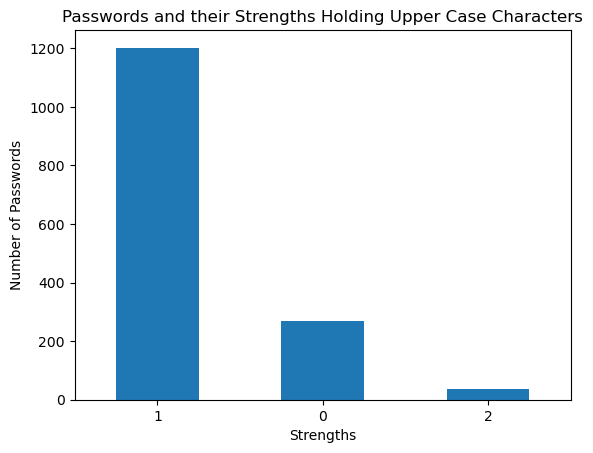

In [24]:
# Plotting a bar plot for number of passwords versus strengths.

password_strength["Strength"].value_counts().plot(kind="bar")
plt.title("Passwords and their Strengths Holding Upper Case Characters")
plt.xlabel("Strengths")
plt.ylabel("Number of Passwords")
plt.xticks(rotation="horizontal")
plt.show()

### Conclusion 5:

1506 passwords hold upper case characters and they mostly have moderate strengths.

### Analysis 6:

Analyzing the passwords and their strengths holding title case characters.

In [25]:
# Extracting passwords and their strengths holding title case characters into a Pandas DataFrame.

password_strength = data[data["Password"].str.istitle()]
password_strength

,Password,Strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [26]:
# Printing number of passwords holding title case characters.

data["Password"].str.istitle().sum()

932

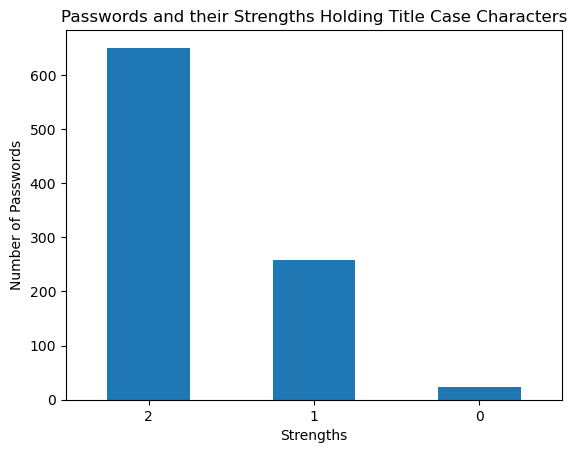

In [27]:
# Plotting a bar plot for number of passwords versus strengths.

password_strength["Strength"].value_counts().plot(kind="bar")
plt.title("Passwords and their Strengths Holding Title Case Characters")
plt.xlabel("Strengths")
plt.ylabel("Number of Passwords")
plt.xticks(rotation="horizontal")
plt.show()

### Conclusion 6:

932 passwords hold title case characters and they mostly have high strengths.

### Analysis 7:

Analyzing the passwords and their strengths holding special characters.

In [28]:
# Defining a function to check for special characters.

def check_special_characters(password):
    
    for character in password:
        
        if character in string.punctuation:
            
            return 1

In [29]:
# Extracting passwords and their strengths holding special characters into a Pandas DataFrame.

password_strength = data[data["Password"].apply(check_special_characters) == 1]
password_strength

,Password,Strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [30]:
# Printing number of passwords holding special characters.

password_strength.value_counts().sum()

2663

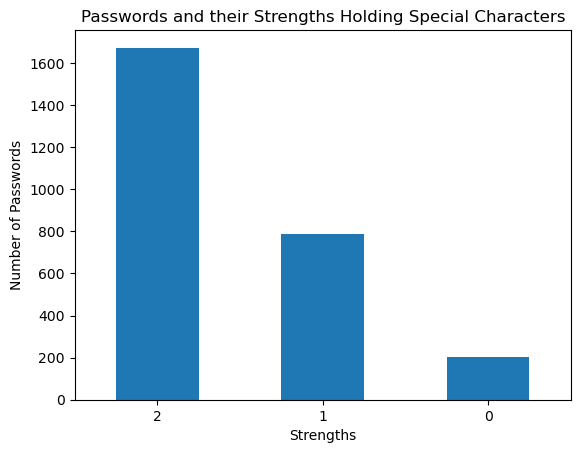

In [31]:
# Plotting a bar plot for number of passwords versus strengths.

password_strength["Strength"].value_counts().plot(kind="bar")
plt.title("Passwords and their Strengths Holding Special Characters")
plt.xlabel("Strengths")
plt.ylabel("Number of Passwords")
plt.xticks(rotation="horizontal")
plt.show()

### Conclusion 7:

2663 passwords hold special characters and they mostly have high strengths.

## Feature Engineering

In [32]:
# Defining a function to calculate normalized frequency of numeric characters.

def frequency_numeric(password):
    
    return len([character for character in password if character.isnumeric()]) / len(password)

# Defining a function to calculate normalized frequency of lower case characters.

def frequency_lower_case(password):
    
    return len([character for character in password if character.islower()]) / len(password)

# Defining a function to calculate normalized frequency of upper case characters.

def frequency_upper_case(password):
    
    return len([character for character in password if character.isupper()]) / len(password)

# Defining a function to calculate normalized frequency of title case characters.

def frequency_title_case(password):
    
    return len([character for character in password if character.istitle()]) / len(password)

# Defining a function to calculate normalized frequency of special characters.

def frequency_special(password):
    
    return len([character for character in password if character in string.punctuation]) / len(password)

In [33]:
# Adding a column for length of password.

data["Length"] = data["Password"].str.len()

# Adding a column for normalized frequency of numeric characters.

data["Frequency_Numeric"] = data["Password"].apply(frequency_numeric)

# Adding a column for normalized frequency of lower case characters.

data["Frequency_Lower_Case"] = data["Password"].apply(frequency_lower_case)

# Adding a column for normalized frequency of upper case characters.

data["Frequency_Upper_Case"] = data["Password"].apply(frequency_upper_case)

# Adding a column for normalized frequency of title case characters.

data["Frequency_Title_Case"] = data["Password"].apply(frequency_title_case)

# Adding a column for normalized frequency of special characters.

data["Frequency_Special"] = data["Password"].apply(frequency_special)

In [34]:
# Printing first five rows of data.

data.head()

,Password,Strength,Length,Frequency_Numeric,Frequency_Lower_Case,Frequency_Upper_Case,Frequency_Title_Case,Frequency_Special
0,zxe870819,1,9,0.666667,0.333333,0.0,0.0,0.000000
1,xw46454nr23l,1,12,0.583333,0.416667,0.0,0.0,0.000000
2,soporte13,1,9,0.222222,0.777778,0.0,0.0,0.000000
3,accounts6000webhost.com,2,23,0.173913,0.782609,0.0,0.0,0.043478
4,c443balg,1,8,0.375000,0.625000,0.0,0.0,0.000000


## Descriptive Statistics

In [35]:
# Printing columns.

data.columns

Index(['Password', 'Strength', 'Length', 'Frequency_Numeric',
       'Frequency_Lower_Case', 'Frequency_Upper_Case', 'Frequency_Title_Case',
       'Frequency_Special'],
      dtype='object')

In [36]:
# Calculating descriptive statistics.

for column in ["Length", "Frequency_Numeric", "Frequency_Lower_Case", "Frequency_Upper_Case", "Frequency_Title_Case",
               "Frequency_Special"]:
    
    print(data[["Strength", column]].groupby("Strength").agg(["min", "max", "mean", "median"]))
    print("\n")

         Length                       
            min  max       mean median
Strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


         Frequency_Numeric                              
                       min       max      mean    median
Strength                                                
0                      0.0  1.000000  0.275283  0.285714
1                      0.0  0.923077  0.360161  0.333333
2                      0.0  0.894737  0.193818  0.187500


         Frequency_Lower_Case                              
                          min       max      mean    median
Strength                                                   
0                         0.0  1.000000  0.708151  0.714286
1                         0.0  0.923077  0.630029  0.666667
2                         0.0  0.916667  0.424673  0.400000


         Frequency_Upper_Case                             

<Axes: xlabel='Strength', ylabel='Frequency_Special'>

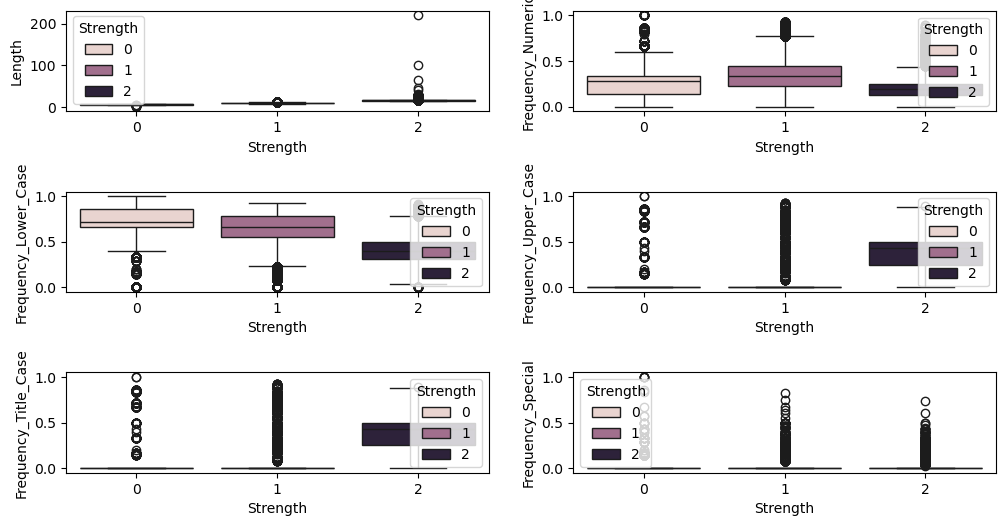

In [37]:
# Plotting a plot with three rows and two columns.

figure, ((axis1, axis2), (axis3, axis4), (axis5, axis6)) = plt.subplots(3, 2, figsize=(12, 6))

# Adjusting layout of subplots.

plt.subplots_adjust(hspace=0.8)

# Plotting box plots as subplots.

sns.boxplot(data, x="Strength", y="Length", hue="Strength", ax=axis1)
sns.boxplot(data, x="Strength", y="Frequency_Numeric", hue="Strength", ax=axis2)
sns.boxplot(data, x="Strength", y="Frequency_Lower_Case", hue="Strength", ax=axis3)
sns.boxplot(data, x="Strength", y="Frequency_Upper_Case", hue="Strength", ax=axis4)
sns.boxplot(data, x="Strength", y="Frequency_Title_Case", hue="Strength", ax=axis5)
sns.boxplot(data, x="Strength", y="Frequency_Special", hue="Strength", ax=axis6)

## Univariate Analysis

In [38]:
# Printing columns.

data.columns

Index(['Password', 'Strength', 'Length', 'Frequency_Numeric',
       'Frequency_Lower_Case', 'Frequency_Upper_Case', 'Frequency_Title_Case',
       'Frequency_Special'],
      dtype='object')

In [39]:
# Defining a function to plot a violin plot and a distribution plot as subplots.

def plot_violin_distribution(data, column):
    
    # Adjusting figure size.
    
    plt.figure(figsize=(12, 6))
    
    # Plotting first column of subplot.
    
    plt.subplot(1, 2, 1)
    
    # Plotting a violin plot as subplot.
    
    sns.violinplot(data, x="Strength", y=column)
    
    # Plotting second column of subplot.
    
    plt.subplot(1, 2, 2)
    
    # Plotting a distribution plot as subplot.
    
    sns.distplot(a=data[data["Strength"]==0][column], hist=False, color="blue", label="0")
    sns.distplot(a=data[data["Strength"]==1][column], hist=False, color="orange", label="1")
    sns.distplot(a=data[data["Strength"]==2][column], hist=False, color="green", label="2")
    plt.legend()

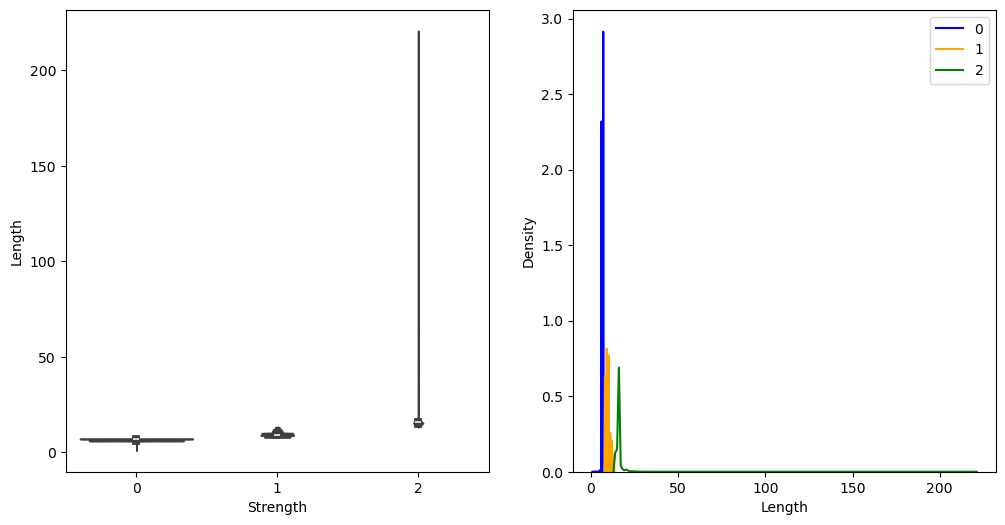

In [40]:
# Plotting a violin plot and a distribution plot as subplots for Length column.

plot_violin_distribution(data, "Length")

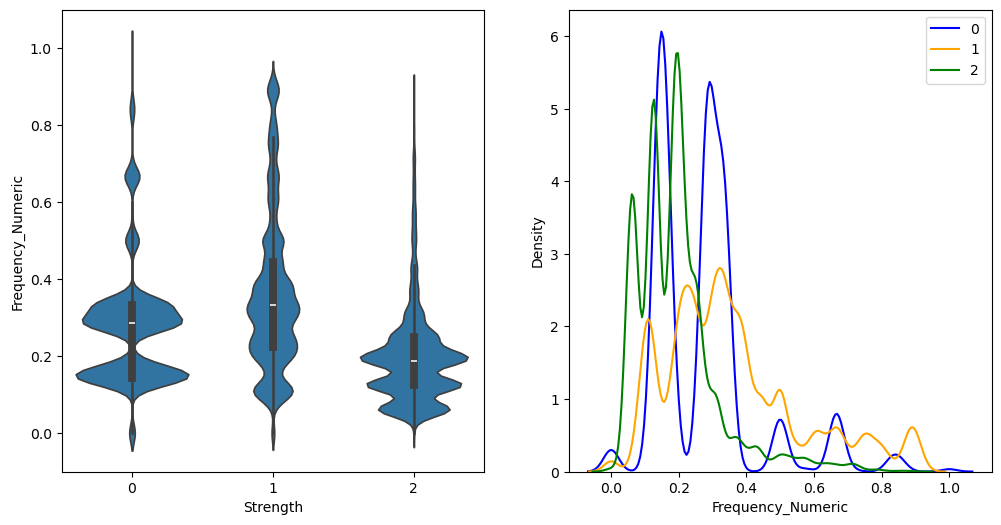

In [41]:
# Plotting a violin plot and a distribution plot as subplots for Frequency_Numeric column.

plot_violin_distribution(data, "Frequency_Numeric")

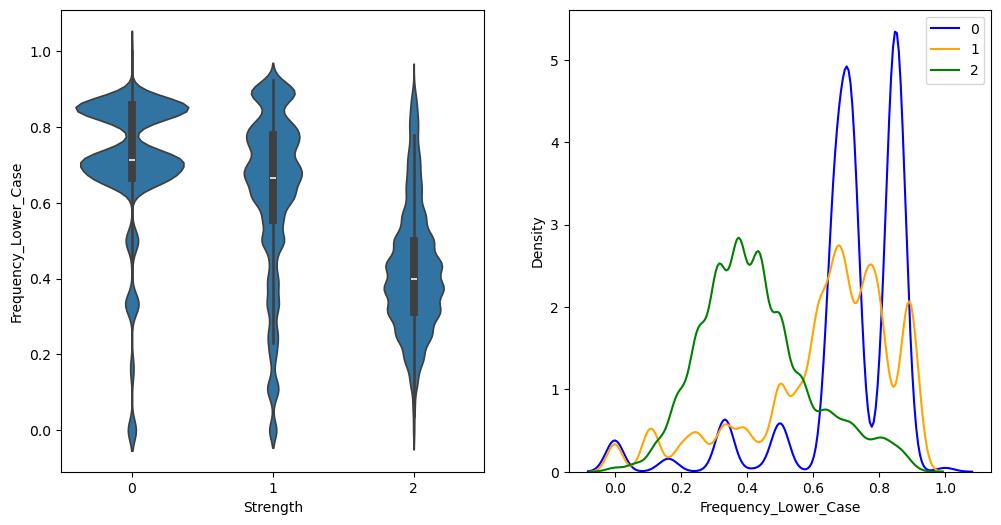

In [42]:
# Plotting a violin plot and a distribution plot as subplots for Frequency_Lower_Case column.

plot_violin_distribution(data, "Frequency_Lower_Case")

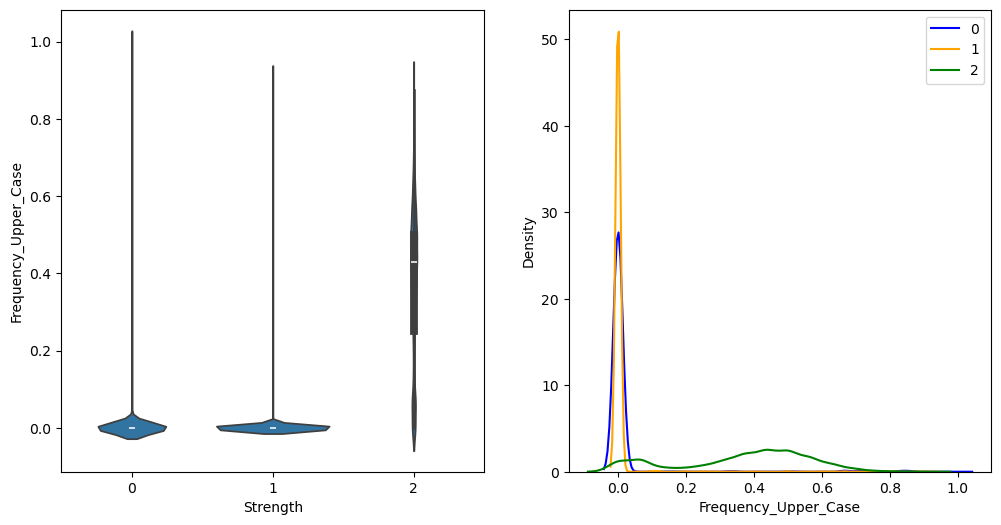

In [43]:
# Plotting a violin plot and a distribution plot as subplots for Frequency_Upper_Case column.

plot_violin_distribution(data, "Frequency_Upper_Case")

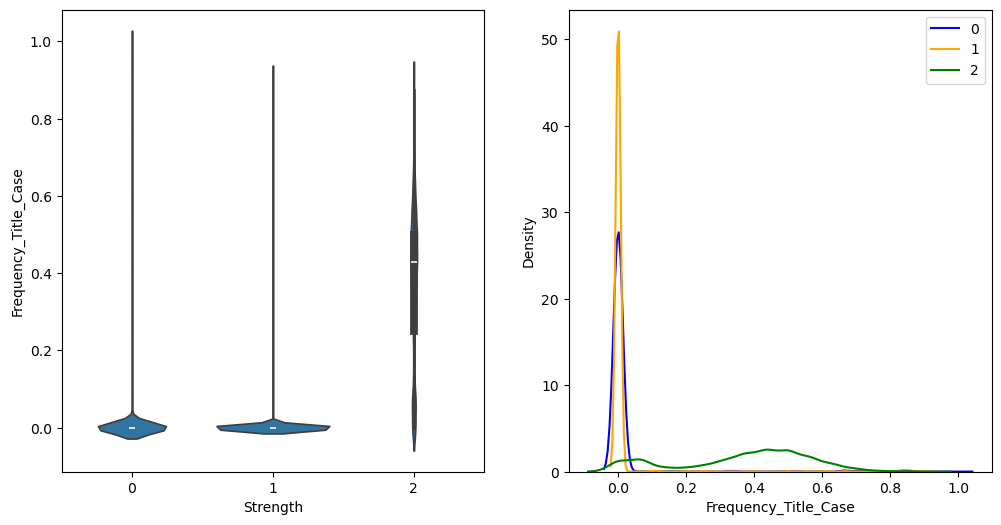

In [44]:
# Plotting a violin plot and a distribution plot as subplots for Frequency_Title_Case column.

plot_violin_distribution(data, "Frequency_Title_Case")

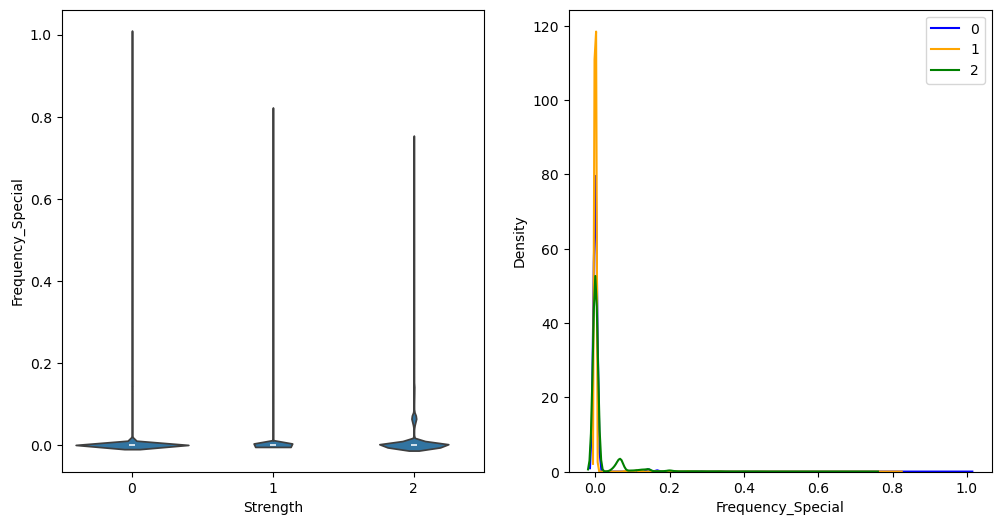

In [45]:
# Plotting a violin plot and a distribution plot as subplots for Frequency_Special column.

plot_violin_distribution(data, "Frequency_Special")

## Natural Language Processing

In [46]:
# Randomly shuffling and assigning data into a Pandas DataFrame.

data_random = data.sample(frac=1)

In [47]:
# Printing first five rows of randomized data.

data_random.head()

,Password,Strength,Length,Frequency_Numeric,Frequency_Lower_Case,Frequency_Upper_Case,Frequency_Title_Case,Frequency_Special
89049,eG5HjlzkxNgx9dMQ,2,16,0.125000,0.562500,0.3125,0.3125,0.0
84608,stein2009,1,9,0.444444,0.555556,0.0000,0.0000,0.0
74053,aa77nnaa22,1,10,0.400000,0.600000,0.0000,0.0000,0.0
6174,EVaVzfTgzNA1XuWA,2,16,0.062500,0.375000,0.5625,0.5625,0.0
67903,crt6wdfmj25f,1,12,0.250000,0.750000,0.0000,0.0000,0.0


In [48]:
# Assigning Password column contents into a list.

password = list(data_random["Password"])

In [49]:
# Building a vectorizer to convert data into a matrix of TF-IDF features.

vectorizer = TfidfVectorizer(analyzer="char")

# Building learn vocabulary and IDF.

X = vectorizer.fit_transform(password)

In [50]:
# Printing a TF-IDF weighted document-term matrix.

X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
# Getting feature names for transformation.

vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [52]:
# Appending TF-IDF weighted document-term matrix and feature names into a Pandas DataFrame.

data_transform = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [53]:
# Printing first five rows of transformed data.

data_transform.head()

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [54]:
# Copying Length column contents into transformed data.

data_transform["Length"] = data_random["Length"]

# Copying Frequency_Lower_Case column contents into transformed data.

data_transform["Frequency_Lower_Case"] = data_random["Frequency_Lower_Case"]

In [55]:
# Printing first five rows of transformed data.

data_transform.head()

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,Length,Frequency_Lower_Case
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.416667
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.777778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.782609
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625000


In [56]:
# Assigning feature matrix.

X = data_transform

# Assigning target vector.

y = data_random["Strength"]

## Machine Learning

In [57]:
# Splitting data into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22)

In [58]:
# Building a logistic regression classifier model.

model = LogisticRegression(multi_class="multinomial")

# Fitting model on training set.

model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [59]:
# Predicting class labels for samples in testing set.

y_prediction = model.predict(X_test)
y_prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
# Assigning predictions into a Pandas DataFrame.

predictions = pd.DataFrame(y_prediction)
predictions.columns = ["Strength Predictions"]
predictions.set_index("Strength Predictions", inplace=True)

# Printing predictions.

predictions

""
Strength Predictions
1
1
1
1
1
...
1
1
1


In [61]:
# Printing classification accuracy score.

accuracy_score(y_test, y_prediction)

0.7991363636363636

In [62]:
# Printing a confusion matrix to evaluate accuracy of classification.

confusion_matrix(y_test, y_prediction)

array([[  819,  2232,     3],
       [  661, 15151,   375],
       [   69,  1079,  1611]], dtype=int64)

In [63]:
# Printing a report to evaluate main classification metrics.

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.53      0.27      0.36      3054
           1       0.82      0.94      0.87     16187
           2       0.81      0.58      0.68      2759

    accuracy                           0.80     22000
   macro avg       0.72      0.60      0.64     22000
weighted avg       0.78      0.80      0.78     22000



## Machine Learning Pipeline Automation

In [64]:
# Defining a function to predict strength.

def predict_strength():
    
    # Reading a string from standard input.
    
    password = np.array([input("Enter Password: ")])
    
    # Transforming input password to document-term matrix.
    
    X = vectorizer.transform(password)
    
    # Appending TF-IDF weighted document-term matrix, length of password and normalized frequency of lower case characters.
    
    password_transform = np.append(X.toarray(), (len(password), frequency_lower_case(password))).reshape(1, X_train.shape[1])
    
    # Predicting class label for input password.
    
    prediction = model.predict(password_transform)
    
    # Printing predicted strength for input password.
    
    if prediction == 0:
        
        print("Strength: Weak")
        
    elif prediction == 1:
        
        print("Strength: Moderate")
        
    else:
        
        print("Strength: Strong")

In [65]:
# Predicting strength for input password.

predict_strength()

Enter Password:  python


Strength: Weak


In [66]:
# Predicting strength for input password.

predict_strength()

Enter Password:  python3


Strength: Moderate


In [67]:
# Predicting strength for input password.

predict_strength()

Enter Password:  python@3


Strength: Strong
